**Decision Tree**

O Algorítimo cria uma árvore de decisão baseado nos dados de treinamento para classificar novos registros

Vantagens :

- Fácil interpretação / entendimento
- Os dados não precisam ser normalizados ou padronizados para treinar o modelo
- Bastante rápido para classificar novos registros


Desvantagens :
- Potencial para a criação de árvores muito complexas (lembrando que a construção da mesma problema np-completo)
- Tem problemas de variância (pouca sensibilidade a mudanças na base de treinamento o que acaba levando a overfiting). As vezes é preciso "podar" a base de treinamento


In [82]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# carregando a base de dados de  credito
base = pd.read_csv('../../res/credit-data.csv')
#base = pd.read_csv('../../res/risco-credito.csv')
base.shape
#base


(2000, 5)

In [83]:
#efetuando correcoes nos dados de credito

print('Eliminando as idades negativas\n')

#em alguns registros o campo idade possui numeros menores que zero
regs =base.loc[base['age'] < 0] 
print('antes :\n')
print(base.iloc[regs.index])

# calculando a media dos valores nao negativos do campo idade
media = base[base['age']>0]['age'].mean()

#setando os valores negativos com o valor da media dos nao negativos
base.loc[base.age < 0, 'age'] = media

print('\ndepois :\n')
print(base.iloc[regs.index])

print('\nEliminando registros NaN da base\n')
print('antes :\n')


regs=base.loc[pd.isnull(base).any(axis=1)]
print(base.iloc[regs.index])

for column in base.columns:
    base[column].fillna(base[column].mean(),inplace=True)

print('\ndepois : \n')
print(base.iloc[regs.index])

Eliminando as idades negativas

antes :

    clientid        income        age         loan  default
15        16  50501.726689 -28.218361  3977.287432        0
21        22  32197.620701 -52.423280  4244.057136        0
26        27  63287.038908 -36.496976  9595.286289        0

depois :

    clientid        income      age         loan  default
15        16  50501.726689  40.9277  3977.287432        0
21        22  32197.620701  40.9277  4244.057136        0
26        27  63287.038908  40.9277  9595.286289        0

Eliminando registros NaN da base

antes :

    clientid        income  age         loan  default
28        29  59417.805406  NaN  2082.625938        0
30        31  48528.852796  NaN  6155.784670        0
31        32  23526.302555  NaN  2862.010139        0

depois : 

    clientid        income      age         loan  default
28        29  59417.805406  40.9277  2082.625938        0
30        31  48528.852796  40.9277  6155.784670        0
31        32  23526.302555  40

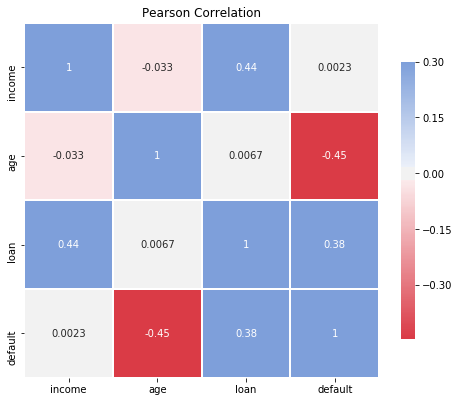

In [84]:
# Criando uma tabela de correlacao de pearson para entender a correlacao entre as variaveis
# Como existem poucas features qualquer remoção prejudica a performance do algoritimo

corr = base[['income','age','loan','default']].corr()
ds=len(base.columns)-1


cmap = sns.diverging_palette(10, 255, as_cmap=True)

plt.figure(figsize=(13, 8))
plt.subplot(1, 2, 1)
plt.title("Pearson Correlation")
ax = sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=1, annot=True, cbar_kws={"shrink": .5})
ax.set_ylim(ds, 0)

plt.tight_layout()
plt.show()


In [85]:
# separando previsores e classificadores
previsores = base.iloc[:, 1:4].values
#print(previsores)
classificadores = base.iloc[:, 4].values

#print ( base.iloc[:, 4].unique())

# padronizando os valores dos previsores
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

# separando os valores de teste e treinamento 
previsores_treinamento, previsores_teste, classificadores_treinamento, classificadores_teste = train_test_split(previsores, classificadores, test_size=0.25, random_state=0)

print ("previsores treinamento /teste ",previsores_treinamento.shape,previsores_teste.shape)
print ("classificadores treinamento /teste ",classificadores_treinamento.shape,classificadores_teste.shape)

previsores treinamento /teste  (1500, 3) (500, 3)
classificadores treinamento /teste  (1500,) (500,)


In [86]:
# instanciando a decision tree com o scikit
#classificador = GaussianNB()
#classificador.fit(previsores_treinamento, classificadores_treinamento)
classificador = DecisionTreeClassifier(criterion='entropy')
classificador.fit(previsores_treinamento, classificadores_treinamento)

#verificando a importancia de cada feature para o algoritimo
print(classificador.feature_importances_)



# rodando previsoes com o dado de teste
previsoes = classificador.predict(previsores_teste)

[0.20691161 0.40032162 0.39276678]


In [87]:
#testes dessa instancia algoritimo

# o dado de precisao per se nao quer dizer muita coisa e preciso verificar outras metricas
precisao = accuracy_score(classificadores_teste, previsoes)

# uma dessas metricas eh a matriz de confusao ... ela e capaz de mostrar o desempenho do algoritimo para cada classe 
matriz = confusion_matrix(classificadores_teste, previsoes)

#o scikit tambem possui uma classe utilitaria que prove um report mais detalhado...
report = classification_report(classificadores_teste, previsoes)

print("Precisão:\n")
print(precisao)
print("\nMatriz de confusão:\n")
print(matriz)
print("\nReport:\n")
print (report)

Precisão:

0.984

Matriz de confusão:

[[430   6]
 [  2  62]]

Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       436
           1       0.91      0.97      0.94        64

    accuracy                           0.98       500
   macro avg       0.95      0.98      0.97       500
weighted avg       0.98      0.98      0.98       500

